In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('house_pricing.csv')

In [8]:
X = data.iloc[:, :-1] # all the rows, all the columns except the last one
y = data.iloc[:, -1]  # all the rows, only the last column

In [10]:
# Split the dataset into train and test
# test_size=0.3 means 70% of dataset for training and remaining 30% for testing
# random_state(random_state = 1 or anyvalue) everytime the result will be same,i.e, same values in train and test datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [28]:
param_grid = {'max_depth': [2, 3, 5, 6, 8, 10, 15, 20, 30, 50],
              'max_leaf_nodes': [2, 3, 4, 5, 10, 15, 20],
              'max_features': [4, 8, 20, 25]}

In [29]:
dtc = DecisionTreeRegressor(random_state= 9)
gscv = GridSearchCV(dtc, param_grid, cv = 5, scoring = 'r2')
gscv.fit(X_train, y_train)
y_predict = gscv.predict(X_test)
r2 = r2_score(y_test, y_predict)

In [30]:
print(r2, gscv.best_params_, gscv.best_estimator_)

0.5972774635868003 {'max_depth': 3, 'max_features': 25, 'max_leaf_nodes': 20} DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=25,
           max_leaf_nodes=20, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=9, splitter='best')


# Observing variation between error and max depth
If we can observe what is actually happening as we increase the maximum depth( the length of the longest path from a root to a leaf) along with the variation in errors we can get to know of that how depth is having an effect over error.

In [32]:
depth_list = [2, 8, 10, 15, 20, 25, 30, 35, 45, 50, 80]

In [33]:
mse_train = []
mse_test = []

In [37]:
for d in depth_list:
        clf = DecisionTreeRegressor(random_state = 9, max_depth = d)
        clf.fit(X_train, y_train)
        mse_test.append(mean_squared_error(y_test, clf.predict(X_test)))
        mse_train.append(mean_squared_error(y_train, clf.predict(X_train)))

Text(0, 0.5, 'MSE')

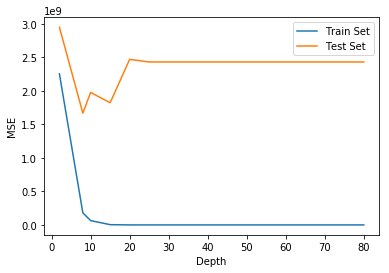

In [39]:
fig, ax = plt.subplots()
ax.plot(depth_list, mse_train, label = 'Train Set')
ax.plot(depth_list, mse_test, label = 'Test Set')
ax.legend()
plt.xlabel('Depth')
plt.ylabel('MSE')